In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 100
import dask.dataframe as dd

In [2]:
RANDOM_STATE = 13

In [3]:
test = pd.read_csv('data_test.csv')
train = pd.read_csv('data_train.csv')

In [4]:
train.head()

,Unnamed: 0,id,vas_id,buy_time,target
0,0,540968,8.0,1537131600,0.0
1,1,1454121,4.0,1531688400,0.0
2,2,2458816,1.0,1534107600,0.0
3,3,3535012,5.0,1535922000,0.0
4,4,1693214,1.0,1535922000,0.0


In [5]:
test.head()

,Unnamed: 0,id,vas_id,buy_time
0,0,3130519,2.0,1548018000
1,1,2000860,4.0,1548018000
2,2,1099444,2.0,1546808400
3,3,1343255,5.0,1547413200
4,4,1277040,2.0,1546808400


In [6]:
features = dd.read_csv('features.csv', sep='\t')

In [7]:
features.head()

,Unnamed: 0,id,buy_time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,...,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252
0,0,2013026,1531688400,18.910029,46.980888,4.969214,-1.386798,3.791754,-14.01179,-16.08618,-65.076097,-6.783660,-30.006538,-2.736081,-4.007526,-2.558912,49.520873,38.19189,-0.000725,-0.016435,-0.107041,-1.17746,-3.178521,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-42.026959,-2841.496068,-1085.821501,-1755.674564,-89.504287,-119.724355,-70.712019,-54.069191,-16.642826,-7.896282,...,0.0,0.039208,0.665644,-0.008999,-11953.712824,-45175.257711,0.377099,-30.716053,-61790.157098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,0.377104,-0.00004,0.379228,-0.012257,-0.107878,9.595373e+08,-42.014078,-4.405604e+08,1.356414e+09,5.565998,-1.465191,-33.302382,-249.128986,-36.772492,-0.364694,-0.133771,-0.209468,-32.356505,-109.884564,-876.69102,-5.368281,-247.110707,-108.409742,-512.437331,-84.617978,-17.295406,-977.373846,-613.770792,-25.996269,-37.630448,-301.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
1,1,2014722,1539550800,36.690029,152.400888,448.069214,563.833202,463.841754,568.99821,-16.08618,-53.216097,-6.783660,-26.544905,-2.736081,-4.007526,-2.558912,67.300873,55.97189,-0.000725,-0.016435,-0.107041,15.77254,-3.178521,411.379185,-10.744164,-0.094251,-0.001733,-0.009327,131.407791,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-192.026959,-2937.657200,-1181.982633,-1755.674564,447.193953,1258.981645,-119.662019,-54.602524,-65.059494,29.770382,...,0.0,0.039208,-0.334356,-0.008999,-1035.951824,-45175.257711,-0.622901,-30.716053,-61790.157098,0.756864,-39131.166127,-9239.707081,-2.10805,-0.000083,-0.622896,-0.00004,-0.620772,-0.012257,-0.107878,9.673997e+08,-39.474078,1.033869e+09,-1.204418e+08,5.232666,-0.465191,-33.302382,38.871014,4.227508,-0.364694,-0.133771,-0.209468,2.643495,-109.884564,-573.69102,3.631719,43.889293,-108.409742,-509.437331,-27.617978,-5.295406,-891.373846,-544.770792,-20.996269,48.369552,80.252276,-13.832889,-0.694428,-1.175933,-0.45614,0.0
2,2,2015199,1545598800,-67.019971,157.050888,-63.180786,178.103202,-68.598246,156.99821,3.51382,25.183903,-0.417924,-1.689642,-2.736081,9.226737,-2.558912,-66.189127,-69.87811,-0.000725,-0.016435,-0.107041,-5.41746,-0.638521,3.839185,8.855836,-0.094251,-0.001733,-0.009327,0.457791,0.200138,-0.00909,0.648138,0.785634,0.788392,-0.001884,-0.000023,-0.00003,16.94061,-0.065583,1.839235,507.973041,11357.393596,5126.807163,6230.586136,-89.504287,-119.724355,-25.128689,-24.602526,-0.526164,-7.896282,...,0.0,0.039208,-0.334356,-0.008999,1109.231176,-45175.257711,0.377099,-30.716053,-61790.157098,0.756864,-41331.166127,-9239.707081,-2.10805,-0.000083,0.377104,-0.00004,0.379228,-0.012257,-0.107878,9.734477e+08,-55.744078,1.087204e+09,-1.204418e+08,-10.580668,-0.465191,-19.302382,149.871014,119.227508,-0.364694,-0.133771,-0.209468,123.643495,-109.884564,-873.69102,-2.368281,-247.110707,-108.409742,-512.437331,2232.382022,-17.295406,-977.373846,-613.770792,-12.996269,-37.630448,10829.252276,-25.832889,-0.694428,-12.175933,-0.45614,0.0
3,3,2021765,1534107600,7.010029,150.200888,-6.930786,216.213202,76.621754,351.84821,-16.08618,-65.076097,-6.783660,-30.006538,-2.736081,-4.007526,-2.558912,37.620873,26.29189,-0.000725,-0.016435,-0.107041,83.55254,-3.178521,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,7.973041,-1382.965804,363.802563,-1746.768314,-89.504287,-119.724355,-71.128686,-38.819191,-32.309494,-7.896282,...,0.0,0.03

In [8]:
features_train = features.loc[features['id'].isin(train['id'])].compute()

In [9]:
train['id'].shape

(831653,)

In [10]:
train['id'].nunique()

806613

In [11]:
not_unique = train['id'].shape[0] - train['id'].nunique()
not_unique

25040

In [12]:
train[train['id'].duplicated(keep=False)].head()

,Unnamed: 0,id,vas_id,buy_time,target
41,41,361173,4.0,1542574800,1.0
42,42,361173,5.0,1544389200,0.0
48,48,1869370,2.0,1537736400,0.0
49,49,1869370,4.0,1542574800,1.0
52,52,675583,2.0,1535317200,0.0


In [13]:
features_train.duplicated().sum()

0

In [14]:
features_train.shape

(834168, 256)

In [15]:
features_train['id'].nunique()

806613

In [16]:
not_unique = features_train.shape[0] - features_train['id'].nunique()
not_unique

27555

In [17]:
features_train[features_train['id'].duplicated(keep=False)].sort_values(by='id').head()

,Unnamed: 0,id,buy_time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,...,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252
5968,3664458,372,1544389200,159.560029,-100.259112,146.889214,-110.936798,141.471754,-132.04179,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,188.050873,176.72189,-0.000725,-0.016435,-0.107041,-5.41746,-1.058521,-12.670815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,0.648138,0.785634,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,7.973041,1784.432596,-556.642787,2341.075436,-89.504287,-119.724355,-47.645349,-11.919190,-35.726158,-7.896282,...,0.0,0.039208,-0.334356,-0.008999,-1838.058824,-43389.257711,0.377099,-151.226053,-61914.667098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,0.377104,-0.00004,0.379228,-0.012257,-0.107878,9.717197e+08,-57.274078,-4.405604e+08,-1.204418e+08,16.149332,-1.465191,11.697618,-75.128986,-39.772492,-0.364694,-0.133771,-0.209468,-35.356505,-109.884564,-639.69102,-4.368281,-247.110707,127.590258,-512.437331,537.382022,-0.295406,4405.626154,1933.229208,-25.996269,-37.630448,29.252276,-22.832889,-0.694428,-12.175933,-0.45614,0.0
622,982668,372,1544994000,-96.799971,-143.929112,-109.050786,-174.096798,-114.468246,-195.20179,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,-66.189127,-77.51811,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-12.250815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,0.788392,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-192.026959,-2685.536104,-1081.432827,-1604.103274,-89.504287,-119.724355,-94.095351,-43.435857,-50.659494,-7.896282,...,0.0,0.039208,-0.334356,-0.008999,-1838.058824,-45175.257711,-0.622901,-30.716053,-61790.157098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,-0.622896,-0.00004,-0.620772,-0.012257,-0.107878,-5.726695e+08,-58.544078,-4.405604e+08,-1.204418e+08,12.099332,-1.465191,-33.302382,-254.128986,-39.772492,-0.364694,-0.133771,-0.209468,-35.356505,-109.884564,-876.69102,-5.368281,-247.110707,-108.409742,-512.437331,-27.617978,-17.295406,-835.373846,-471.770792,-25.996269,-37.630448,-290.747724,-22.832889,-0.694428,-12.175933,-0.45614,0.0
21,914805,404,1533502800,-78.159971,499.180888,-84.480786,460.553202,-89.898246,439.44821,-16.08618,556.963903,-6.78366,325.073462,-2.736081,-4.007526,-2.558912,-66.189127,-58.87811,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-6.320815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,-0.799862,-0.00909,1.648138,0.785634,0.788392,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-192.026959,429.423896,-539.401577,968.825436,-89.504287,-119.724355,-70.878682,-27.585856,-43.292828,-7.896282,...,0.0,0.039208,-0.334356,-0.008999,38145.443176,-45175.257711,-0.622901,-30.716053,-61790.157098,0.756864,-40821.166127,-9239.707081,-2.10805,-0.000083,-0.622896,-0.00004,-0.620772,-0.012257,-0.107878,-5.726695e+08,-58.544078,1.064060e+09,-1.204418e+08,8.732666,-1.465191,-33.302382,1300.871014,-39.772492,-0.364694,-0.133771,-0.209468,-35.356505,-109.884564,522.30898,-3.368281,-247.110707,1285.590258,-509.437331,-85.617978,-17.295406,-408.373846,-588.770792,-25.996269,-22.630448,861.252276,34.167111,-0.694428,47.824067,-0.45614,0.0
2821,3600789,404,1540155600,354.550029,164.940888,526.199214,327.583202,520.781754,306.47821,403.40382,354.413903,-6.78366,-30.006538,-2.736081,-4.007526,416.931088,-66.189127,-62.60811,-0.000725,-0.016435,-0.107041,-5.41746,13.771479,171.649185,408.745836,-0.094251,-0.001733,-0.009327,-2.082209,-0.799862,-0.00909,1.648138,0.785634,0.788392,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,1.419235,683.973041,8106.963596,-1145.190642,9252.154436,-89.504287,-119.724355,-5.84

In [18]:
dublicated = features_train[features_train['id'].duplicated(keep=False)].sort_values(by='id')['id'].value_counts()
dublicated

372        2
2963335    2
2962996    2
2962859    2
2962853    2
          ..
1447236    2
1447104    2
1446941    2
1446899    2
4362538    2
Name: id, Length: 27555, dtype: int64

In [19]:
merged_train = pd.merge(train, features_train, on='id')
merged_train.head()

,Unnamed: 0_x,id,vas_id,buy_time_x,target,Unnamed: 0_y,buy_time_y,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,...,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252
0,0,540968,8.0,1537131600,0.0,3756522,1541970000,-31.559971,327.360888,-45.500786,274.753202,-50.918246,253.64821,49.15382,195.883903,-1.835267,-12.831245,-2.736081,56.284081,-2.558912,-66.189127,-77.51811,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-13.940815,54.495836,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,2.648138,0.785634,0.788392,-0.001884,-0.000023,-0.00003,62.58061,-0.065583,-0.700765,-192.026959,239.787096,-1005.230677,1245.017836,-89.504287,-119.724355,...,0.0,0.039208,0.665644,-0.008999,-11953.712824,-45175.257711,-0.622901,-30.716053,-61790.157098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,-0.622896,-0.00004,-0.620772,-0.012257,-0.107878,9.698189e+08,-49.224078,-4.405604e+08,-1.204418e+08,-8.634002,-1.465191,-33.302382,810.871014,270.227508,-0.364694,-0.133771,-0.209468,269.643495,-109.884564,364.30898,41.631719,938.889293,-108.409742,-504.437331,-53.617978,-12.295406,-845.373846,-613.770792,-20.996269,-37.630448,-28.747724,4.167111,7.305572,-12.175933,21.54386,0.0
1,1,1454121,4.0,1531688400,0.0,2735973,1531083600,547.270029,238.430888,533.329214,274.803202,527.911754,253.69821,-16.08618,-65.076097,-6.783660,-30.006538,-2.736081,-4.007526,-2.558912,577.880873,566.55189,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-192.026959,-2764.330054,-1102.746307,-1661.583744,-89.504287,-119.724355,...,0.0,0.039208,0.665644,-0.008999,10798.221176,-45175.257711,-0.622901,-30.716053,-61790.157098,0.756864,-37911.166127,-9239.707081,-2.10805,-0.000083,-0.622896,-0.00004,-0.620772,-0.012257,-0.107878,9.585869e+08,585.525922,1.072212e+09,-1.204418e+08,3.327904,-1.465191,-33.302382,-206.128986,-12.772492,-0.364694,-0.133771,-0.209468,-8.356505,-109.884564,-876.69102,-5.368281,-247.110707,-108.409742,-512.437331,-80.617978,-17.295406,-972.373846,-613.770792,-25.996269,-19.630448,-278.747724,-24.832889,-0.694428,-11.175933,-0.45614,0.0
2,2,2458816,1.0,1534107600,0.0,3586550,1543179600,-92.139971,-95.469112,-106.080786,-139.596798,-111.498246,-142.90179,-16.08618,-65.076097,-6.783660,-30.006538,-2.736081,-4.007526,-2.558912,-66.189127,-74.97811,-0.000725,-0.016435,-0.107041,-5.41746,-1.058521,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-92.026959,-2761.896454,-1112.468962,-1649.427494,-89.504287,-119.724355,...,0.0,0.039208,0.665644,-0.008999,4972.062176,-45175.257711,0.377099,-30.716053,-61790.157098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,0.377104,-0.00004,0.379228,-0.012257,-0.107878,-5.726695e+08,-58.544078,-4.405604e+08,-1.204418e+08,-6.314954,-1.465191,-33.302382,-266.128986,-39.772492,-0.364694,-0.133771,-0.209468,-35.356505,-109.884564,-703.69102,-5.368281,-247.110707,-108.409742,-339.437331,-106.617978,-17.295406,-977.373846,-613.770792,-25.996269,-37.630448,-304.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
3,3,3535012,5.0,1535922000,0.0,1634974,1533502800,54.880029,12.970888,54.079214,-9.116798,48.661754,-30.22179,60.17382,87.453903,-6.783660,-30.006538,73.523919,-4.007526,-2.558912,-9.829127,-2.09811,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-0.800815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,57.973041,-2406.325174,-650.650607,-1755.674564,-89.504287,-119.724355,...,0.0,0.0392

In [20]:
merged_train.shape

(860052, 260)

In [21]:
temp = merged_train.loc[merged_train['id'].isin(dublicated.index)]
temp.head()

,Unnamed: 0_x,id,vas_id,buy_time_x,target,Unnamed: 0_y,buy_time_y,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,...,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252
8,8,2000856,1.0,1534712400,0.0,2114914,1531688400,-21.369971,108.780888,178.619214,770.863202,173.201754,749.75821,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,-66.189127,-42.34811,-0.000725,-0.016435,-0.107041,-5.41746,37.081479,199.989185,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,3.539235,-192.026959,-1464.904304,290.770263,-1755.674564,-89.504287,-119.724355,...,0.0,0.039208,0.665644,-0.008999,47313.637176,-4927.257711,-0.622901,267.703947,-61494.237098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,-0.622896,-0.00004,-0.620772,-0.012257,-0.107878,9.595373e+08,-56.424078,-4.405604e+08,-1.204418e+08,-13.125668,-1.465191,-33.302382,-266.128986,-39.772492,-0.364694,-0.133771,-0.209468,-35.356505,-109.884564,-876.69102,-5.368281,-247.110707,-108.409742,-512.437331,-106.617978,-17.295406,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
9,8,2000856,1.0,1534712400,0.0,4145047,1531083600,-92.559971,48.600888,50.239214,609.863202,44.821754,588.75821,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,-66.189127,-77.51811,-0.000725,-0.016435,-0.107041,-5.41746,1.061479,142.799185,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,3.539235,132.973041,1074.174796,2829.849363,-1755.674564,-89.504287,-119.724355,...,0.0,0.039208,0.665644,-0.008999,47313.637176,4796.742289,2.377099,178.203947,-61584.070428,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,2.377104,-0.00004,2.379228,-0.012257,-0.107878,9.588461e+08,-56.424078,-4.405604e+08,-1.204418e+08,-13.148287,-1.465191,-33.302382,-266.128986,-39.772492,-0.364694,-0.133771,-0.209468,-35.356505,-109.884564,-876.69102,-5.368281,-247.110707,-108.409742,-512.437331,-106.617978,-17.295406,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
58,57,3577738,1.0,1532293200,0.0,2986290,1540760400,-96.799971,45.210888,-104.810786,315.483202,-110.228246,294.37821,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,-66.189127,-77.51811,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-8.010815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,557.973041,-2265.680634,-510.006067,-1755.674564,-89.504287,-119.724355,...,0.0,0.039208,0.665644,-0.008999,54100.803176,-38216.257711,0.377099,648.913947,-61117.527098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,0.377104,-0.00004,0.379228,-0.012257,-0.107878,-5.726695e+08,-58.544078,-4.405604e+08,-1.204418e+08,-8.434001,-1.465191,-33.302382,-251.128986,369.227508,-0.364694,-0.133771,-0.209468,373.643495,-109.884564,-825.69102,-4.368281,-210.110707,-95.409742,-512.437331,-98.617978,-17.295406,-929.373846,-565.770792,-25.996269,-28.630448,-177.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
59,57,3577738,1.0,1532293200,0.0,3235297,1537736400,-96.799971,104.530888,-8.220786,672.223202,-13.638246,651.11821,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,-66.189127,-77.51811,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,88.579185,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-192.026959,-2113.149404,-357.474837,-1755.674564,-89.504287,-119.724355,...,

In [22]:
duplicates = temp['Unnamed: 0_x'].duplicated()
duplicates_to_delete = duplicates[duplicates.values == True]
merged_train.drop(duplicates_to_delete.index, axis=0, inplace=True)
merged_train.head()

,Unnamed: 0_x,id,vas_id,buy_time_x,target,Unnamed: 0_y,buy_time_y,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,...,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252
0,0,540968,8.0,1537131600,0.0,3756522,1541970000,-31.559971,327.360888,-45.500786,274.753202,-50.918246,253.64821,49.15382,195.883903,-1.835267,-12.831245,-2.736081,56.284081,-2.558912,-66.189127,-77.51811,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-13.940815,54.495836,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,2.648138,0.785634,0.788392,-0.001884,-0.000023,-0.00003,62.58061,-0.065583,-0.700765,-192.026959,239.787096,-1005.230677,1245.017836,-89.504287,-119.724355,...,0.0,0.039208,0.665644,-0.008999,-11953.712824,-45175.257711,-0.622901,-30.716053,-61790.157098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,-0.622896,-0.00004,-0.620772,-0.012257,-0.107878,9.698189e+08,-49.224078,-4.405604e+08,-1.204418e+08,-8.634002,-1.465191,-33.302382,810.871014,270.227508,-0.364694,-0.133771,-0.209468,269.643495,-109.884564,364.30898,41.631719,938.889293,-108.409742,-504.437331,-53.617978,-12.295406,-845.373846,-613.770792,-20.996269,-37.630448,-28.747724,4.167111,7.305572,-12.175933,21.54386,0.0
1,1,1454121,4.0,1531688400,0.0,2735973,1531083600,547.270029,238.430888,533.329214,274.803202,527.911754,253.69821,-16.08618,-65.076097,-6.783660,-30.006538,-2.736081,-4.007526,-2.558912,577.880873,566.55189,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-192.026959,-2764.330054,-1102.746307,-1661.583744,-89.504287,-119.724355,...,0.0,0.039208,0.665644,-0.008999,10798.221176,-45175.257711,-0.622901,-30.716053,-61790.157098,0.756864,-37911.166127,-9239.707081,-2.10805,-0.000083,-0.622896,-0.00004,-0.620772,-0.012257,-0.107878,9.585869e+08,585.525922,1.072212e+09,-1.204418e+08,3.327904,-1.465191,-33.302382,-206.128986,-12.772492,-0.364694,-0.133771,-0.209468,-8.356505,-109.884564,-876.69102,-5.368281,-247.110707,-108.409742,-512.437331,-80.617978,-17.295406,-972.373846,-613.770792,-25.996269,-19.630448,-278.747724,-24.832889,-0.694428,-11.175933,-0.45614,0.0
2,2,2458816,1.0,1534107600,0.0,3586550,1543179600,-92.139971,-95.469112,-106.080786,-139.596798,-111.498246,-142.90179,-16.08618,-65.076097,-6.783660,-30.006538,-2.736081,-4.007526,-2.558912,-66.189127,-74.97811,-0.000725,-0.016435,-0.107041,-5.41746,-1.058521,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-92.026959,-2761.896454,-1112.468962,-1649.427494,-89.504287,-119.724355,...,0.0,0.039208,0.665644,-0.008999,4972.062176,-45175.257711,0.377099,-30.716053,-61790.157098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,0.377104,-0.00004,0.379228,-0.012257,-0.107878,-5.726695e+08,-58.544078,-4.405604e+08,-1.204418e+08,-6.314954,-1.465191,-33.302382,-266.128986,-39.772492,-0.364694,-0.133771,-0.209468,-35.356505,-109.884564,-703.69102,-5.368281,-247.110707,-108.409742,-339.437331,-106.617978,-17.295406,-977.373846,-613.770792,-25.996269,-37.630448,-304.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
3,3,3535012,5.0,1535922000,0.0,1634974,1533502800,54.880029,12.970888,54.079214,-9.116798,48.661754,-30.22179,60.17382,87.453903,-6.783660,-30.006538,73.523919,-4.007526,-2.558912,-9.829127,-2.09811,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-0.800815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,57.973041,-2406.325174,-650.650607,-1755.674564,-89.504287,-119.724355,...,0.0,0.0392

In [23]:
merged_train.shape

(831653, 260)

In [24]:
merged_train.drop(['Unnamed: 0_x', 'Unnamed: 0_y', 'buy_time_y'], axis=1, inplace=True)
merged_train.head()

,id,vas_id,buy_time_x,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,...,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252
0,540968,8.0,1537131600,0.0,-31.559971,327.360888,-45.500786,274.753202,-50.918246,253.64821,49.15382,195.883903,-1.835267,-12.831245,-2.736081,56.284081,-2.558912,-66.189127,-77.51811,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-13.940815,54.495836,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,2.648138,0.785634,0.788392,-0.001884,-0.000023,-0.00003,62.58061,-0.065583,-0.700765,-192.026959,239.787096,-1005.230677,1245.017836,-89.504287,-119.724355,-3.512019,33.247476,-36.759494,...,0.0,0.039208,0.665644,-0.008999,-11953.712824,-45175.257711,-0.622901,-30.716053,-61790.157098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,-0.622896,-0.00004,-0.620772,-0.012257,-0.107878,9.698189e+08,-49.224078,-4.405604e+08,-1.204418e+08,-8.634002,-1.465191,-33.302382,810.871014,270.227508,-0.364694,-0.133771,-0.209468,269.643495,-109.884564,364.30898,41.631719,938.889293,-108.409742,-504.437331,-53.617978,-12.295406,-845.373846,-613.770792,-20.996269,-37.630448,-28.747724,4.167111,7.305572,-12.175933,21.54386,0.0
1,1454121,4.0,1531688400,0.0,547.270029,238.430888,533.329214,274.803202,527.911754,253.69821,-16.08618,-65.076097,-6.783660,-30.006538,-2.736081,-4.007526,-2.558912,577.880873,566.55189,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-192.026959,-2764.330054,-1102.746307,-1661.583744,-89.504287,-119.724355,-119.662019,-54.602524,-65.059494,...,0.0,0.039208,0.665644,-0.008999,10798.221176,-45175.257711,-0.622901,-30.716053,-61790.157098,0.756864,-37911.166127,-9239.707081,-2.10805,-0.000083,-0.622896,-0.00004,-0.620772,-0.012257,-0.107878,9.585869e+08,585.525922,1.072212e+09,-1.204418e+08,3.327904,-1.465191,-33.302382,-206.128986,-12.772492,-0.364694,-0.133771,-0.209468,-8.356505,-109.884564,-876.69102,-5.368281,-247.110707,-108.409742,-512.437331,-80.617978,-17.295406,-972.373846,-613.770792,-25.996269,-19.630448,-278.747724,-24.832889,-0.694428,-11.175933,-0.45614,0.0
2,2458816,1.0,1534107600,0.0,-92.139971,-95.469112,-106.080786,-139.596798,-111.498246,-142.90179,-16.08618,-65.076097,-6.783660,-30.006538,-2.736081,-4.007526,-2.558912,-66.189127,-74.97811,-0.000725,-0.016435,-0.107041,-5.41746,-1.058521,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-92.026959,-2761.896454,-1112.468962,-1649.427494,-89.504287,-119.724355,-101.378686,-39.569191,-61.809494,...,0.0,0.039208,0.665644,-0.008999,4972.062176,-45175.257711,0.377099,-30.716053,-61790.157098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,0.377104,-0.00004,0.379228,-0.012257,-0.107878,-5.726695e+08,-58.544078,-4.405604e+08,-1.204418e+08,-6.314954,-1.465191,-33.302382,-266.128986,-39.772492,-0.364694,-0.133771,-0.209468,-35.356505,-109.884564,-703.69102,-5.368281,-247.110707,-108.409742,-339.437331,-106.617978,-17.295406,-977.373846,-613.770792,-25.996269,-37.630448,-304.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
3,3535012,5.0,1535922000,0.0,54.880029,12.970888,54.079214,-9.116798,48.661754,-30.22179,60.17382,87.453903,-6.783660,-30.006538,73.523919,-4.007526,-2.558912,-9.829127,-2.09811,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-0.800815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,57.973041,-2406.325174,-650.650607,-1755.674564,-89.504287,-119.724355,-33.495355,-54.602524,21.10

In [25]:
merged_train.to_csv('new_train.csv')

In [26]:
features_test = features.loc[features['id'].isin(test['id'])].compute()

In [27]:
test['id'].shape

(71231,)

In [28]:
test['id'].nunique()

70152

In [29]:
not_unique = test['id'].shape[0] - test['id'].nunique()
not_unique

1079

In [30]:
test[test['id'].duplicated(keep=False)].sort_values(by='id').head()

,Unnamed: 0,id,vas_id,buy_time
552,552,274,4.0,1548018000
551,551,274,2.0,1547413200
10677,10677,4770,4.0,1547413200
10676,10676,4770,2.0,1548018000
20241,20241,8166,1.0,1546808400


In [31]:
features_test.duplicated().sum()

0

In [32]:
features_test.shape

(72552, 256)

In [33]:
features_test['id'].nunique()

70152

In [34]:
not_unique = features_test.shape[0] - features_test['id'].nunique()
not_unique

2400

In [35]:
features_test[features_test['id'].duplicated(keep=False)].sort_values(by='id').head()

,Unnamed: 0,id,buy_time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,...,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252
3023,9755,1544,1535317200,56.090029,46.140888,126.899214,78.283202,121.481754,57.17821,-16.08618,-31.176097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,82.120873,75.37189,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,70.809185,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,87.273041,-2006.042944,-1019.173067,-986.869864,-89.504287,-119.724355,-89.028686,-40.119190,-48.909494,-7.896282,...,0.0,0.039208,-0.334356,-0.008999,4881.756176,-44820.257711,2.377099,121.603947,-61812.837098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,2.377104,-0.00004,2.379228,-0.012257,-0.107878,9.629069e+08,89.765922,-4.405604e+08,-1.204418e+08,-9.747727,-1.465191,-33.302382,-209.128986,-39.772492,-0.364694,-0.133771,-0.209468,-35.356505,-109.884564,-156.69102,-2.368281,12.889293,-108.409742,-55.437331,-106.617978,-17.295406,-974.373846,-613.770792,-23.996269,-37.630448,-179.747724,-14.832889,-0.694428,-1.175933,-0.45614,0.0
5052,1995811,1544,1546203600,68.940029,11.930888,182.759214,415.013202,177.341754,393.90821,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,42.920873,31.59189,-0.000725,-0.016435,-0.107041,-5.41746,53.451479,113.819185,-10.744164,-0.094251,-0.001733,-0.009327,46.297791,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,0.829235,70.093041,-233.803704,-1062.577357,828.773636,-89.504287,-119.724355,-94.295352,-45.235857,-49.059494,-7.896282,...,0.0,0.039208,-0.334356,-0.008999,30221.187176,50147.742289,1.377099,0.403947,-61755.857098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,1.377104,-0.00004,1.379228,-0.012257,-0.107878,9.735341e+08,-42.734078,-4.405604e+08,-1.204418e+08,-11.211779,-1.465191,-33.302382,136.871014,-34.772492,-0.364694,-0.133771,-0.209468,-35.356505,-109.884564,1029.30898,9.631719,914.889293,-108.409742,216.562669,-26.617978,-16.295406,-883.373846,-541.770792,-22.996269,-37.630448,68.252276,-4.832889,-0.694428,-12.175933,-0.45614,1.0
2105,2167703,4279,1545598800,-34.499971,-142.449112,-45.900786,-192.516798,-51.318246,-213.62179,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,-3.889127,-15.21811,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-11.400815,-10.744164,-0.094251,-0.001733,-0.009327,42.437791,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-192.026959,-2897.914037,-1142.239470,-1755.674564,-89.504287,-119.724355,-119.162019,-54.602524,-64.559494,-7.896282,...,0.0,0.039208,0.665644,-0.008999,-11953.712824,-45175.257711,-0.622901,-30.716053,-61790.157098,0.756864,-40611.166127,-9239.707081,-2.10805,-0.000083,-0.622896,-0.00004,-0.620772,-0.012257,-0.107878,9.734477e+08,-52.184078,1.022982e+09,-1.204418e+08,1.024332,-1.465191,-33.302382,-266.128986,-39.772492,-0.364694,-0.133771,-0.209468,-35.356505,-109.884564,-876.69102,-5.368281,-247.110707,-108.409742,-512.437331,-106.617978,-17.295406,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
1792,4265509,4279,1546203600,-35.399971,-143.349112,-49.340786,-193.416798,-54.758246,-214.52179,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,-4.789127,-16.11811,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,41.777791,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-192.026959,-2886.691381,-1131.016814,-1755.674564,-89.504287,-119.724355,-104.0620

In [36]:
dublicated1 = features_test[features_test['id'].duplicated(keep=False)].sort_values(by='id')['id'].value_counts()
dublicated1

1544       2
2859864    2
2864284    2
2865984    2
2867564    2
          ..
1338449    2
1341932    2
1342757    2
1349463    2
4362664    2
Name: id, Length: 2400, dtype: int64

In [37]:
merged_test = pd.merge(test, features_test, on='id')
merged_test.head()

,Unnamed: 0_x,id,vas_id,buy_time_x,Unnamed: 0_y,buy_time_y,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,...,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252
0,0,3130519,2.0,1548018000,1871362,1536526800,-62.899971,-374.279112,-72.600786,-418.406798,-78.018246,-439.51179,17.81382,-31.176097,-6.78366,-30.006538,31.163919,-4.007526,-2.558912,-66.189127,-77.51811,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-9.700815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-92.026959,-2847.354464,-1091.679897,-1755.674564,-89.504287,-119.724355,-88.778686,...,0.0,0.039208,-0.334356,-0.008999,-11953.712824,10384.742289,0.377099,-30.716053,-61790.157098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,0.377104,-0.00004,0.379228,-0.012257,-0.107878,-5.726695e+08,-58.544078,-4.405604e+08,-1.204418e+08,6.899332,-1.465191,-32.302382,-252.128986,-39.772492,-0.364694,-0.133771,-0.209468,-35.356505,-109.884564,-876.69102,-5.368281,-247.110707,-108.409742,-512.437331,-84.617978,-17.295406,-970.373846,-613.770792,-25.996269,-37.630448,-258.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
1,1,2000860,4.0,1548018000,2024591,1532293200,-96.799971,100.290888,-110.740786,140.903202,-116.158246,119.79821,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,-66.189127,-77.51811,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-192.026959,-2941.477513,-1186.665250,-1754.812260,-89.504287,-119.724355,-89.412021,...,0.0,0.039208,0.665644,-0.008999,15960.799176,559624.742289,-0.622901,-30.716053,-61790.157098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,-0.622896,-0.00004,-0.620772,-0.012257,-0.107878,-5.726695e+08,-58.544078,-4.405604e+08,-1.204418e+08,1.399332,-1.465191,-33.302382,-265.128986,-39.772492,-0.364694,-0.133771,-0.209468,-35.356505,-109.884564,-873.69102,-3.368281,-247.110707,-108.409742,-511.437331,-106.617978,-17.295406,-977.373846,-613.770792,-25.996269,-37.630448,-254.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
2,2,1099444,2.0,1546808400,4041332,1541365200,-81.969971,-390.729112,-95.910786,-443.336798,-101.328246,-464.44179,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,-66.189127,-64.80811,-0.000725,-0.016435,-0.107041,-5.41746,-1.058521,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,-0.799862,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,407.973041,-2942.440404,-1186.765837,-1755.674564,-89.504287,-119.724355,-116.645353,...,0.0,0.039208,-0.334356,-0.008999,-12274.540404,-45175.257711,0.377099,-30.716053,-61790.157098,0.756864,-42051.156127,-9239.707081,-2.10805,-0.000083,0.377104,-0.00004,0.379228,-0.012257,-0.107878,-5.726695e+08,-58.544078,1.065420e+09,-1.204418e+08,-6.100668,-1.465191,-33.302382,-266.128986,-39.772492,-0.364694,-0.133771,-0.209468,-35.356505,-109.884564,-876.69102,-5.368281,-247.110707,-108.409742,-512.437331,-106.617978,-17.295406,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0
3,3,1343255,5.0,1547413200,1945062,1536526800,259.130029,-52.249112,245.189214,-104.856798,239.771754,-125.96179,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,289.740873,278.41189,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-192.026959,-2942.440404,-1186.765837,-17

In [38]:
temp1 = merged_test.loc[merged_test['id'].isin(dublicated.index)]
temp1.head()

,Unnamed: 0_x,id,vas_id,buy_time_x,Unnamed: 0_y,buy_time_y,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,...,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252
1291,1247,496733,2.0,1548018000,2584453,1545598800,565.890029,498.490888,568.899214,479.783202,563.481754,458.67821,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,352.420873,585.17189,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,3.009185,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,157.973041,-2942.440404,-1186.765837,-1755.674564,-89.504287,-119.724355,-49.678679,...,0.0,0.039208,-0.334356,-0.008999,19455.785176,16215.742289,1.377099,-243.606053,-62005.047098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,1.377104,-0.00004,1.379228,-0.012257,-0.107878,9.731885e+08,348.235922,-4.405604e+08,-1.204418e+08,-13.320180,-1.465191,-33.302382,-266.128986,-39.772492,-0.364694,-0.133771,-0.209468,-35.356505,-109.884564,-876.69102,-5.368281,-247.110707,-108.409742,-512.437331,-106.617978,-17.295406,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
1292,1247,496733,2.0,1548018000,3240451,1543784400,-45.979971,318.840888,-59.920786,266.233202,-65.338246,245.12821,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,-56.049127,-26.69811,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-132.026959,-2942.440404,-1186.765837,-1755.674564,-89.504287,-119.724355,-69.778689,...,0.0,0.039208,-0.334356,-0.008999,19455.785176,175434.742289,1.377099,-31.606053,-61793.047098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,1.377104,-0.00004,1.379228,-0.012257,-0.107878,9.716333e+08,-56.854078,-4.405604e+08,-1.204418e+08,-12.950668,-1.465191,-33.302382,-266.128986,-39.772492,-0.364694,-0.133771,-0.209468,-35.356505,-109.884564,-876.69102,-5.368281,-247.110707,-108.409742,-512.437331,-106.617978,-17.295406,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
2177,2101,136761,4.0,1546808400,892786,1541365200,-30.719971,-1.109112,-20.090786,15.753202,-25.508246,-5.35179,7.63382,77.243903,16.93634,112.313462,-2.736081,-4.007526,-2.558912,-23.829127,-35.15811,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,10.629185,12.975836,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,0.648138,0.785634,0.788392,-0.001884,-0.000023,-0.00003,21.06061,-0.065583,-0.700765,-100.526959,-414.737304,1340.937263,-1755.674564,-89.504287,-119.724355,61.171311,...,0.0,0.039208,0.665644,-0.008999,-11953.712824,300436.742289,0.377099,66.943947,-61699.497098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,0.377104,-0.00004,0.379228,-0.012257,-0.107878,9.692141e+08,-47.954078,-4.405604e+08,-1.204418e+08,-5.886382,-1.465191,-33.302382,-239.128986,128.227508,-0.364694,-0.133771,-0.209468,132.643495,-109.884564,-367.69102,1.631719,254.889293,-108.409742,-512.437331,-53.617978,-17.295406,992.626154,1329.229208,-23.996269,-37.630448,-195.747724,-24.832889,-0.694428,-11.175933,-0.45614,1.0
2178,2101,136761,4.0,1546808400,1005787,1542574800,61.210029,-2.369112,59.979214,-1.596798,54.561754,-22.70179,25.42382,65.383903,34.72634,100.453462,-2.736081,-4.007526,-2.558912,7.940873,38.98189,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-1.230815,-4.814164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,21.06061,-0.065583,-0.700765,7.973041,-265.181604,1490.492963,-1755.674564,-89.504287,-119.72

In [39]:
duplicates = temp1['Unnamed: 0_x'].duplicated()
duplicates_to_delete = duplicates[duplicates.values == True]
merged_test.drop(duplicates_to_delete.index, axis=0, inplace=True)
merged_test.head()

,Unnamed: 0_x,id,vas_id,buy_time_x,Unnamed: 0_y,buy_time_y,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,...,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252
0,0,3130519,2.0,1548018000,1871362,1536526800,-62.899971,-374.279112,-72.600786,-418.406798,-78.018246,-439.51179,17.81382,-31.176097,-6.78366,-30.006538,31.163919,-4.007526,-2.558912,-66.189127,-77.51811,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-9.700815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-92.026959,-2847.354464,-1091.679897,-1755.674564,-89.504287,-119.724355,-88.778686,...,0.0,0.039208,-0.334356,-0.008999,-11953.712824,10384.742289,0.377099,-30.716053,-61790.157098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,0.377104,-0.00004,0.379228,-0.012257,-0.107878,-5.726695e+08,-58.544078,-4.405604e+08,-1.204418e+08,6.899332,-1.465191,-32.302382,-252.128986,-39.772492,-0.364694,-0.133771,-0.209468,-35.356505,-109.884564,-876.69102,-5.368281,-247.110707,-108.409742,-512.437331,-84.617978,-17.295406,-970.373846,-613.770792,-25.996269,-37.630448,-258.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
1,1,2000860,4.0,1548018000,2024591,1532293200,-96.799971,100.290888,-110.740786,140.903202,-116.158246,119.79821,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,-66.189127,-77.51811,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-192.026959,-2941.477513,-1186.665250,-1754.812260,-89.504287,-119.724355,-89.412021,...,0.0,0.039208,0.665644,-0.008999,15960.799176,559624.742289,-0.622901,-30.716053,-61790.157098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,-0.622896,-0.00004,-0.620772,-0.012257,-0.107878,-5.726695e+08,-58.544078,-4.405604e+08,-1.204418e+08,1.399332,-1.465191,-33.302382,-265.128986,-39.772492,-0.364694,-0.133771,-0.209468,-35.356505,-109.884564,-873.69102,-3.368281,-247.110707,-108.409742,-511.437331,-106.617978,-17.295406,-977.373846,-613.770792,-25.996269,-37.630448,-254.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
2,2,1099444,2.0,1546808400,4041332,1541365200,-81.969971,-390.729112,-95.910786,-443.336798,-101.328246,-464.44179,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,-66.189127,-64.80811,-0.000725,-0.016435,-0.107041,-5.41746,-1.058521,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,-0.799862,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,407.973041,-2942.440404,-1186.765837,-1755.674564,-89.504287,-119.724355,-116.645353,...,0.0,0.039208,-0.334356,-0.008999,-12274.540404,-45175.257711,0.377099,-30.716053,-61790.157098,0.756864,-42051.156127,-9239.707081,-2.10805,-0.000083,0.377104,-0.00004,0.379228,-0.012257,-0.107878,-5.726695e+08,-58.544078,1.065420e+09,-1.204418e+08,-6.100668,-1.465191,-33.302382,-266.128986,-39.772492,-0.364694,-0.133771,-0.209468,-35.356505,-109.884564,-876.69102,-5.368281,-247.110707,-108.409742,-512.437331,-106.617978,-17.295406,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0
3,3,1343255,5.0,1547413200,1945062,1536526800,259.130029,-52.249112,245.189214,-104.856798,239.771754,-125.96179,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,289.740873,278.41189,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-192.026959,-2942.440404,-1186.765837,-17

In [40]:
merged_test.shape

(73519, 259)

In [41]:
merged_test.drop(['Unnamed: 0_x', 'Unnamed: 0_y', 'buy_time_y'], axis=1, inplace=True)
merged_test.head()

,id,vas_id,buy_time_x,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,...,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252
0,3130519,2.0,1548018000,-62.899971,-374.279112,-72.600786,-418.406798,-78.018246,-439.51179,17.81382,-31.176097,-6.78366,-30.006538,31.163919,-4.007526,-2.558912,-66.189127,-77.51811,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-9.700815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-92.026959,-2847.354464,-1091.679897,-1755.674564,-89.504287,-119.724355,-88.778686,-35.052524,-53.726160,-7.896282,...,0.0,0.039208,-0.334356,-0.008999,-11953.712824,10384.742289,0.377099,-30.716053,-61790.157098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,0.377104,-0.00004,0.379228,-0.012257,-0.107878,-5.726695e+08,-58.544078,-4.405604e+08,-1.204418e+08,6.899332,-1.465191,-32.302382,-252.128986,-39.772492,-0.364694,-0.133771,-0.209468,-35.356505,-109.884564,-876.69102,-5.368281,-247.110707,-108.409742,-512.437331,-84.617978,-17.295406,-970.373846,-613.770792,-25.996269,-37.630448,-258.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
1,2000860,4.0,1548018000,-96.799971,100.290888,-110.740786,140.903202,-116.158246,119.79821,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,-66.189127,-77.51811,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-192.026959,-2941.477513,-1186.665250,-1754.812260,-89.504287,-119.724355,-89.412021,-24.352526,-65.059494,-7.896282,...,0.0,0.039208,0.665644,-0.008999,15960.799176,559624.742289,-0.622901,-30.716053,-61790.157098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,-0.622896,-0.00004,-0.620772,-0.012257,-0.107878,-5.726695e+08,-58.544078,-4.405604e+08,-1.204418e+08,1.399332,-1.465191,-33.302382,-265.128986,-39.772492,-0.364694,-0.133771,-0.209468,-35.356505,-109.884564,-873.69102,-3.368281,-247.110707,-108.409742,-511.437331,-106.617978,-17.295406,-977.373846,-613.770792,-25.996269,-37.630448,-254.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
2,1099444,2.0,1546808400,-81.969971,-390.729112,-95.910786,-443.336798,-101.328246,-464.44179,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,-66.189127,-64.80811,-0.000725,-0.016435,-0.107041,-5.41746,-1.058521,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,-0.799862,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,407.973041,-2942.440404,-1186.765837,-1755.674564,-89.504287,-119.724355,-116.645353,-52.169191,-64.476161,-7.896282,...,0.0,0.039208,-0.334356,-0.008999,-12274.540404,-45175.257711,0.377099,-30.716053,-61790.157098,0.756864,-42051.156127,-9239.707081,-2.10805,-0.000083,0.377104,-0.00004,0.379228,-0.012257,-0.107878,-5.726695e+08,-58.544078,1.065420e+09,-1.204418e+08,-6.100668,-1.465191,-33.302382,-266.128986,-39.772492,-0.364694,-0.133771,-0.209468,-35.356505,-109.884564,-876.69102,-5.368281,-247.110707,-108.409742,-512.437331,-106.617978,-17.295406,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0
3,1343255,5.0,1547413200,259.130029,-52.249112,245.189214,-104.856798,239.771754,-125.96179,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,289.740873,278.41189,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-192.026959,-2942.440404,-1186.765837,-1755.674564,-89.50

In [42]:
merged_test.to_csv('my_test.csv')

In [43]:
%%time
train = pd.read_csv('new_train.csv')
test = pd.read_csv('my_test.csv')

CPU times: total: 25.5 s
Wall time: 25.5 s


In [44]:

train.head()

,Unnamed: 0,id,vas_id,buy_time_x,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,...,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252
0,0,540968,8.0,1537131600,0.0,-31.559971,327.360888,-45.500786,274.753202,-50.918246,253.64821,49.15382,195.883903,-1.835267,-12.831245,-2.736081,56.284081,-2.558912,-66.189127,-77.51811,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-13.940815,54.495836,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,2.648138,0.785634,0.788392,-0.001884,-0.000023,-0.00003,62.58061,-0.065583,-0.700765,-192.026959,239.787096,-1005.230677,1245.017836,-89.504287,-119.724355,-3.512019,33.247476,...,0.0,0.039208,0.665644,-0.008999,-11953.712824,-45175.257711,-0.622901,-30.716053,-61790.157098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,-0.622896,-0.00004,-0.620772,-0.012257,-0.107878,9.698189e+08,-49.224078,-4.405604e+08,-1.204418e+08,-8.634002,-1.465191,-33.302382,810.871014,270.227508,-0.364694,-0.133771,-0.209468,269.643495,-109.884564,364.30898,41.631719,938.889293,-108.409742,-504.437331,-53.617978,-12.295406,-845.373846,-613.770792,-20.996269,-37.630448,-28.747724,4.167111,7.305572,-12.175933,21.54386,0.0
1,1,1454121,4.0,1531688400,0.0,547.270029,238.430888,533.329214,274.803202,527.911754,253.69821,-16.08618,-65.076097,-6.783660,-30.006538,-2.736081,-4.007526,-2.558912,577.880873,566.55189,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-192.026959,-2764.330054,-1102.746307,-1661.583744,-89.504287,-119.724355,-119.662019,-54.602524,...,0.0,0.039208,0.665644,-0.008999,10798.221176,-45175.257711,-0.622901,-30.716053,-61790.157098,0.756864,-37911.166127,-9239.707081,-2.10805,-0.000083,-0.622896,-0.00004,-0.620772,-0.012257,-0.107878,9.585869e+08,585.525922,1.072212e+09,-1.204418e+08,3.327904,-1.465191,-33.302382,-206.128986,-12.772492,-0.364694,-0.133771,-0.209468,-8.356505,-109.884564,-876.69102,-5.368281,-247.110707,-108.409742,-512.437331,-80.617978,-17.295406,-972.373846,-613.770792,-25.996269,-19.630448,-278.747724,-24.832889,-0.694428,-11.175933,-0.45614,0.0
2,2,2458816,1.0,1534107600,0.0,-92.139971,-95.469112,-106.080786,-139.596798,-111.498246,-142.90179,-16.08618,-65.076097,-6.783660,-30.006538,-2.736081,-4.007526,-2.558912,-66.189127,-74.97811,-0.000725,-0.016435,-0.107041,-5.41746,-1.058521,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-92.026959,-2761.896454,-1112.468962,-1649.427494,-89.504287,-119.724355,-101.378686,-39.569191,...,0.0,0.039208,0.665644,-0.008999,4972.062176,-45175.257711,0.377099,-30.716053,-61790.157098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,0.377104,-0.00004,0.379228,-0.012257,-0.107878,-5.726695e+08,-58.544078,-4.405604e+08,-1.204418e+08,-6.314954,-1.465191,-33.302382,-266.128986,-39.772492,-0.364694,-0.133771,-0.209468,-35.356505,-109.884564,-703.69102,-5.368281,-247.110707,-108.409742,-339.437331,-106.617978,-17.295406,-977.373846,-613.770792,-25.996269,-37.630448,-304.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
3,3,3535012,5.0,1535922000,0.0,54.880029,12.970888,54.079214,-9.116798,48.661754,-30.22179,60.17382,87.453903,-6.783660,-30.006538,73.523919,-4.007526,-2.558912,-9.829127,-2.09811,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-0.800815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,57.973041,-2406.325174,-650.650607,-1755.674564,-89.504287,-119.724355,-33.495355,-54.602524,...,0.0,0.039208,0.665

In [45]:
test.head()

,Unnamed: 0,id,vas_id,buy_time_x,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,...,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252
0,0,3130519,2.0,1548018000,-62.899971,-374.279112,-72.600786,-418.406798,-78.018246,-439.51179,17.81382,-31.176097,-6.78366,-30.006538,31.163919,-4.007526,-2.558912,-66.189127,-77.51811,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-9.700815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-92.026959,-2847.354464,-1091.679897,-1755.674564,-89.504287,-119.724355,-88.778686,-35.052524,-53.726160,...,0.0,0.039208,-0.334356,-0.008999,-11953.712824,10384.742289,0.377099,-30.716053,-61790.157098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,0.377104,-0.00004,0.379228,-0.012257,-0.107878,-5.726695e+08,-58.544078,-4.405604e+08,-1.204418e+08,6.899332,-1.465191,-32.302382,-252.128986,-39.772492,-0.364694,-0.133771,-0.209468,-35.356505,-109.884564,-876.69102,-5.368281,-247.110707,-108.409742,-512.437331,-84.617978,-17.295406,-970.373846,-613.770792,-25.996269,-37.630448,-258.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
1,1,2000860,4.0,1548018000,-96.799971,100.290888,-110.740786,140.903202,-116.158246,119.79821,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,-66.189127,-77.51811,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-192.026959,-2941.477513,-1186.665250,-1754.812260,-89.504287,-119.724355,-89.412021,-24.352526,-65.059494,...,0.0,0.039208,0.665644,-0.008999,15960.799176,559624.742289,-0.622901,-30.716053,-61790.157098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,-0.622896,-0.00004,-0.620772,-0.012257,-0.107878,-5.726695e+08,-58.544078,-4.405604e+08,-1.204418e+08,1.399332,-1.465191,-33.302382,-265.128986,-39.772492,-0.364694,-0.133771,-0.209468,-35.356505,-109.884564,-873.69102,-3.368281,-247.110707,-108.409742,-511.437331,-106.617978,-17.295406,-977.373846,-613.770792,-25.996269,-37.630448,-254.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
2,2,1099444,2.0,1546808400,-81.969971,-390.729112,-95.910786,-443.336798,-101.328246,-464.44179,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,-66.189127,-64.80811,-0.000725,-0.016435,-0.107041,-5.41746,-1.058521,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,-0.799862,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,407.973041,-2942.440404,-1186.765837,-1755.674564,-89.504287,-119.724355,-116.645353,-52.169191,-64.476161,...,0.0,0.039208,-0.334356,-0.008999,-12274.540404,-45175.257711,0.377099,-30.716053,-61790.157098,0.756864,-42051.156127,-9239.707081,-2.10805,-0.000083,0.377104,-0.00004,0.379228,-0.012257,-0.107878,-5.726695e+08,-58.544078,1.065420e+09,-1.204418e+08,-6.100668,-1.465191,-33.302382,-266.128986,-39.772492,-0.364694,-0.133771,-0.209468,-35.356505,-109.884564,-876.69102,-5.368281,-247.110707,-108.409742,-512.437331,-106.617978,-17.295406,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0
3,3,1343255,5.0,1547413200,259.130029,-52.249112,245.189214,-104.856798,239.771754,-125.96179,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,289.740873,278.41189,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-192.026959,-2942.440404,-1186.765837,-1755.674564,-89.504287,-119.7243

In [46]:
train_target = train['target']

In [47]:
train = train.drop(['Unnamed: 0', 'target'], axis=1)
test = test.drop(['Unnamed: 0'], axis=1)

In [48]:
train.head()

,id,vas_id,buy_time_x,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,...,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252
0,540968,8.0,1537131600,-31.559971,327.360888,-45.500786,274.753202,-50.918246,253.64821,49.15382,195.883903,-1.835267,-12.831245,-2.736081,56.284081,-2.558912,-66.189127,-77.51811,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-13.940815,54.495836,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,2.648138,0.785634,0.788392,-0.001884,-0.000023,-0.00003,62.58061,-0.065583,-0.700765,-192.026959,239.787096,-1005.230677,1245.017836,-89.504287,-119.724355,-3.512019,33.247476,-36.759494,-7.896282,...,0.0,0.039208,0.665644,-0.008999,-11953.712824,-45175.257711,-0.622901,-30.716053,-61790.157098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,-0.622896,-0.00004,-0.620772,-0.012257,-0.107878,9.698189e+08,-49.224078,-4.405604e+08,-1.204418e+08,-8.634002,-1.465191,-33.302382,810.871014,270.227508,-0.364694,-0.133771,-0.209468,269.643495,-109.884564,364.30898,41.631719,938.889293,-108.409742,-504.437331,-53.617978,-12.295406,-845.373846,-613.770792,-20.996269,-37.630448,-28.747724,4.167111,7.305572,-12.175933,21.54386,0.0
1,1454121,4.0,1531688400,547.270029,238.430888,533.329214,274.803202,527.911754,253.69821,-16.08618,-65.076097,-6.783660,-30.006538,-2.736081,-4.007526,-2.558912,577.880873,566.55189,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-192.026959,-2764.330054,-1102.746307,-1661.583744,-89.504287,-119.724355,-119.662019,-54.602524,-65.059494,49.787052,...,0.0,0.039208,0.665644,-0.008999,10798.221176,-45175.257711,-0.622901,-30.716053,-61790.157098,0.756864,-37911.166127,-9239.707081,-2.10805,-0.000083,-0.622896,-0.00004,-0.620772,-0.012257,-0.107878,9.585869e+08,585.525922,1.072212e+09,-1.204418e+08,3.327904,-1.465191,-33.302382,-206.128986,-12.772492,-0.364694,-0.133771,-0.209468,-8.356505,-109.884564,-876.69102,-5.368281,-247.110707,-108.409742,-512.437331,-80.617978,-17.295406,-972.373846,-613.770792,-25.996269,-19.630448,-278.747724,-24.832889,-0.694428,-11.175933,-0.45614,0.0
2,2458816,1.0,1534107600,-92.139971,-95.469112,-106.080786,-139.596798,-111.498246,-142.90179,-16.08618,-65.076097,-6.783660,-30.006538,-2.736081,-4.007526,-2.558912,-66.189127,-74.97811,-0.000725,-0.016435,-0.107041,-5.41746,-1.058521,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-92.026959,-2761.896454,-1112.468962,-1649.427494,-89.504287,-119.724355,-101.378686,-39.569191,-61.809494,-7.896282,...,0.0,0.039208,0.665644,-0.008999,4972.062176,-45175.257711,0.377099,-30.716053,-61790.157098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,0.377104,-0.00004,0.379228,-0.012257,-0.107878,-5.726695e+08,-58.544078,-4.405604e+08,-1.204418e+08,-6.314954,-1.465191,-33.302382,-266.128986,-39.772492,-0.364694,-0.133771,-0.209468,-35.356505,-109.884564,-703.69102,-5.368281,-247.110707,-108.409742,-339.437331,-106.617978,-17.295406,-977.373846,-613.770792,-25.996269,-37.630448,-304.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
3,3535012,5.0,1535922000,54.880029,12.970888,54.079214,-9.116798,48.661754,-30.22179,60.17382,87.453903,-6.783660,-30.006538,73.523919,-4.007526,-2.558912,-9.829127,-2.09811,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-0.800815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,57.973041,-2406.325174,-650.650607,-1755.674564,-89.504287,-119.724355,-33.495355,-54.60

In [49]:
test.head()

,id,vas_id,buy_time_x,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,...,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252
0,3130519,2.0,1548018000,-62.899971,-374.279112,-72.600786,-418.406798,-78.018246,-439.51179,17.81382,-31.176097,-6.78366,-30.006538,31.163919,-4.007526,-2.558912,-66.189127,-77.51811,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-9.700815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-92.026959,-2847.354464,-1091.679897,-1755.674564,-89.504287,-119.724355,-88.778686,-35.052524,-53.726160,-7.896282,...,0.0,0.039208,-0.334356,-0.008999,-11953.712824,10384.742289,0.377099,-30.716053,-61790.157098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,0.377104,-0.00004,0.379228,-0.012257,-0.107878,-5.726695e+08,-58.544078,-4.405604e+08,-1.204418e+08,6.899332,-1.465191,-32.302382,-252.128986,-39.772492,-0.364694,-0.133771,-0.209468,-35.356505,-109.884564,-876.69102,-5.368281,-247.110707,-108.409742,-512.437331,-84.617978,-17.295406,-970.373846,-613.770792,-25.996269,-37.630448,-258.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
1,2000860,4.0,1548018000,-96.799971,100.290888,-110.740786,140.903202,-116.158246,119.79821,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,-66.189127,-77.51811,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-192.026959,-2941.477513,-1186.665250,-1754.812260,-89.504287,-119.724355,-89.412021,-24.352526,-65.059494,-7.896282,...,0.0,0.039208,0.665644,-0.008999,15960.799176,559624.742289,-0.622901,-30.716053,-61790.157098,-0.243136,-42051.166127,-9239.707081,-2.10805,-0.000083,-0.622896,-0.00004,-0.620772,-0.012257,-0.107878,-5.726695e+08,-58.544078,-4.405604e+08,-1.204418e+08,1.399332,-1.465191,-33.302382,-265.128986,-39.772492,-0.364694,-0.133771,-0.209468,-35.356505,-109.884564,-873.69102,-3.368281,-247.110707,-108.409742,-511.437331,-106.617978,-17.295406,-977.373846,-613.770792,-25.996269,-37.630448,-254.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
2,1099444,2.0,1546808400,-81.969971,-390.729112,-95.910786,-443.336798,-101.328246,-464.44179,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,-66.189127,-64.80811,-0.000725,-0.016435,-0.107041,-5.41746,-1.058521,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,-0.799862,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,407.973041,-2942.440404,-1186.765837,-1755.674564,-89.504287,-119.724355,-116.645353,-52.169191,-64.476161,-7.896282,...,0.0,0.039208,-0.334356,-0.008999,-12274.540404,-45175.257711,0.377099,-30.716053,-61790.157098,0.756864,-42051.156127,-9239.707081,-2.10805,-0.000083,0.377104,-0.00004,0.379228,-0.012257,-0.107878,-5.726695e+08,-58.544078,1.065420e+09,-1.204418e+08,-6.100668,-1.465191,-33.302382,-266.128986,-39.772492,-0.364694,-0.133771,-0.209468,-35.356505,-109.884564,-876.69102,-5.368281,-247.110707,-108.409742,-512.437331,-106.617978,-17.295406,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,1.0
3,1343255,5.0,1547413200,259.130029,-52.249112,245.189214,-104.856798,239.771754,-125.96179,-16.08618,-65.076097,-6.78366,-30.006538,-2.736081,-4.007526,-2.558912,289.740873,278.41189,-0.000725,-0.016435,-0.107041,-5.41746,-3.178521,-13.940815,-10.744164,-0.094251,-0.001733,-0.009327,-2.082209,0.200138,-0.00909,-0.351862,-0.214366,-0.211608,-0.001884,-0.000023,-0.00003,-2.65939,-0.065583,-0.700765,-192.026959,-2942.440404,-1186.765837,-1755.674564,-89.50

In [50]:
train['vas_id'] = train['vas_id'].astype('int')
test['vas_id'] = test['vas_id'].astype('int')

In [51]:
dis =train_target.value_counts()
dis.index, dis.values

(Float64Index([0.0, 1.0], dtype='float64'),
 array([771467,  60186], dtype=int64))

<AxesSubplot:>

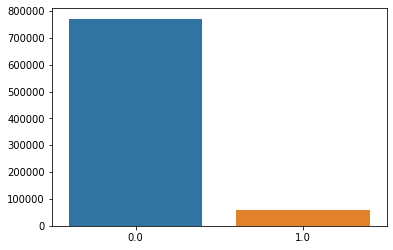

In [52]:
sns.barplot(x=dis.index, y=dis.values)

In [53]:
from sklearn.model_selection import train_test_split

train_idx, valid_idx = train_test_split(train.index, test_size=0.3, random_state=42)

y_train, y_valid = train_target.loc[train_idx], train_target.loc[valid_idx]
X_train, X_valid = train.loc[train_idx], train.loc[valid_idx]

print("Train")
print(train_target.loc[train_idx].value_counts()/train_idx.shape[0])
print()
print("Test")
print(train_target.loc[valid_idx].value_counts()/valid_idx.shape[0])

Train
0.0    0.927666
1.0    0.072334
Name: target, dtype: float64

Test
0.0    0.92755
1.0    0.07245
Name: target, dtype: float64


In [54]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=13, n_jobs=3)

In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

kfold_cv = KFold(n_splits=3, shuffle=True, random_state=13)

def run_cv(estimator, cv, X, y, scoring='roc_auc', model_name=""):
    cv_res = cross_validate(estimator, X, y, cv=cv, scoring=scoring, n_jobs=3)
    
    print("%s: %s = %0.2f (+/- %0.2f)" % (model_name,
                                         scoring,
                                         cv_res['test_score'].mean(),
                                         cv_res['test_score'].std() * 2))

In [56]:
run_cv(log_reg, kfold_cv, X_train, y_train, model_name="Baseline")

Baseline: roc_auc = 0.56 (+/- 0.00)


In [57]:
%%time
log_reg.fit(X_train, y_train)

CPU times: total: 1.5 s
Wall time: 1min 34s


LogisticRegression(n_jobs=3, random_state=13)

In [58]:
log_reg_pred = log_reg.predict_proba(X_valid)[:,1]

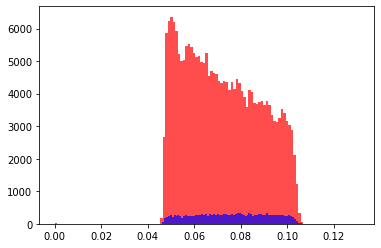

In [59]:
plt.hist(log_reg_pred[~y_valid.astype(bool)], bins=100, color='r', alpha=0.7);
plt.hist(log_reg_pred[y_valid.astype(bool)], bins=100, color='b', alpha=0.7);

In [60]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

fpr, tpr, roc_thresholds = roc_curve(y_valid, log_reg_pred)
precision, recall, pr_thresholds = precision_recall_curve(y_valid, log_reg_pred)

In [61]:
beta = 1 
fscore = (1+beta**2)*(precision * recall) / (beta**2*precision + recall)
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (pr_thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))

Best Threshold=0.072249, F-Score=0.151, Precision=0.087, Recall=0.574


Baseline: AUC_ROC = 0.565


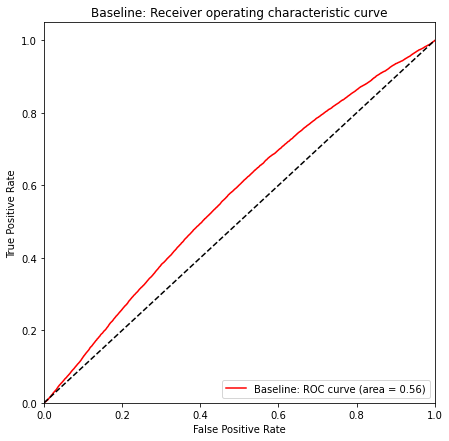

In [62]:
def plot_roc_curve(fpr, tpr, model_name="", color=None):
    plt.plot(fpr, tpr, label='%s: ROC curve (area = %0.2f)' %
             (model_name, auc(fpr, tpr)), color=color)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0.0, 1.0, 0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('%s: Receiver operating characteristic curve' % model_name)
    plt.legend(loc="lower right")

plt.figure(figsize=(7, 7))
plot_roc_curve(fpr, tpr, "Baseline", color='r')
print("Baseline: AUC_ROC = %.3f" % auc(fpr, tpr))

Baseline: AUC_PR = 0.085


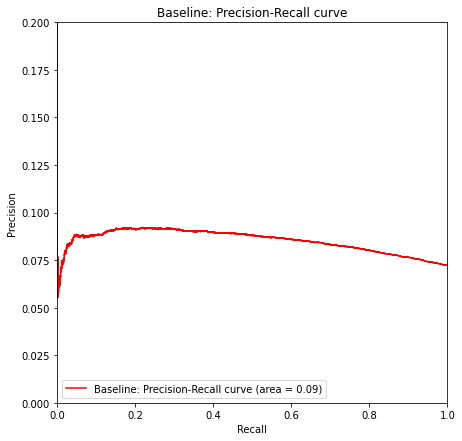

In [63]:
def plot_precision_recall_curve(recall, precision, model_name="", color=None, max_y=0.2):
    plt.plot(recall, precision, label='%s: Precision-Recall curve (area = %0.2f)' %
             (model_name, auc(recall, precision)), color=color)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title("%s: Precision-Recall curve" % model_name)
    plt.axis([0.0, 1.0, 0.0, max_y])
    plt.legend(loc="lower left")

plt.figure(figsize=(7, 7))
    
plot_precision_recall_curve(recall, precision, "Baseline", color='r')
print("Baseline: AUC_PR = %.3f" % auc(recall, precision))

In [64]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          model_name="",
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest',  cmap=cmap)
    
    plt.grid(False)
    plt.title('%s: confusion matrix' % model_name)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[122270 109150]
 [  7708  10368]]


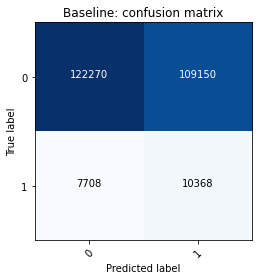

In [65]:
cm = confusion_matrix(y_valid, log_reg_pred > pr_thresholds[ix])
plot_confusion_matrix(cm, classes=["0", "1"], model_name="Baseline")

In [66]:
from sklearn.metrics import classification_report

print(classification_report(y_valid, log_reg_pred > pr_thresholds[ix]))

              precision    recall  f1-score   support

         0.0       0.94      0.53      0.68    231420
         1.0       0.09      0.57      0.15     18076

    accuracy                           0.53    249496
   macro avg       0.51      0.55      0.41    249496
weighted avg       0.88      0.53      0.64    249496



In [67]:
train_unique = train.nunique()
train_unique

id            806613
vas_id             8
buy_time_x        26
0              46205
1             112937
               ...  
248             2345
249              264
250             1596
251              247
252               30
Length: 256, dtype: int64

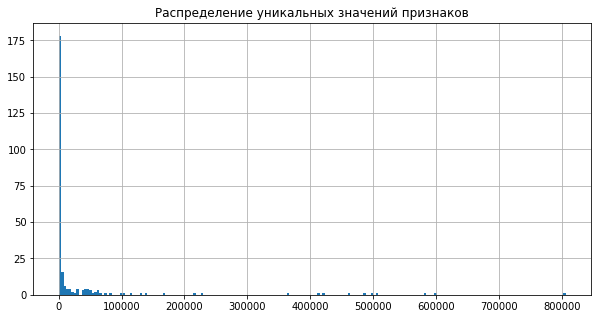

In [68]:
plt.title("Распределение уникальных значений признаков");
train_unique.hist(bins=200, figsize=(10, 5));

In [69]:
f_const = set(train_unique[train_unique == 1].index.tolist())
len(f_const)

5

In [70]:
f_float = (train.fillna(0).astype(int).sum() - train.fillna(0).sum()).abs()
f_float = set(f_float[f_float > 0].index.tolist())
len(f_float)

247

In [71]:
f_other = set(train_unique.index.tolist()) - (f_float | f_const)
len(f_other)

4

In [72]:
f_int = (train.loc[:, f_other].astype(int).sum() - train.loc[:, f_other].sum()).abs()
f_int = set(f_int[f_int == 0].index.tolist())
len(f_int)

4

In [73]:
train['vas_id'].value_counts()

1    310175
2    249505
5     94085
4     85756
6     57878
7     15432
8     13350
9      5472
Name: vas_id, dtype: int64

In [74]:
f_categorical = set(train_unique.loc[f_other][train_unique.loc[f_other] <= 10].index.tolist())
f_categorical

{'vas_id'}

In [75]:
f_other = f_other - f_categorical
len(f_other)

3

In [76]:
f_float = f_float | f_other

In [77]:
f_other = f_other - f_float
len(f_other)

0

In [78]:
print('f_all:', train_unique.shape)
print('---------------')
print('f_const:', len(f_const))
print('f_categorical:', len(f_categorical))
print('f_float:', len(f_float))

f_all: (256,)
---------------
f_const: 5
f_categorical: 1
f_float: 250


In [79]:
f_ok = list(f_categorical | f_float)
f_categorical, f_float = list(f_categorical), list(f_float)

In [80]:
len(f_ok)

251

In [81]:
from sklearn.base import BaseEstimator, TransformerMixin

In [82]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        assert isinstance(X, pd.DataFrame)

        try:
            return X[self.columns]
        except KeyError:
            cols_error = list(set(self.columns) - set(X.columns))
            raise KeyError("DataFrame не содердит следующие колонки: %s" % cols_error)

In [83]:
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [84]:
f_prep_pipeline = make_pipeline(
    ColumnSelector(columns=f_ok),
    FeatureUnion(transformer_list=[
        ("float_features", make_pipeline(
            ColumnSelector(f_float),
            StandardScaler()
        )),
        ("categorical_features", make_pipeline(
            ColumnSelector(f_categorical),
            OneHotEncoder(handle_unknown='ignore')
        ))
    ])
)

In [85]:
%%time
f_prep_pipeline.fit(X_train)

n_features = f_prep_pipeline.transform(X_valid).shape[1]
n_features

CPU times: total: 4.5 s
Wall time: 4.49 s


258

In [86]:
kfold_cv = KFold(n_splits=3, shuffle=True, random_state=13)

In [87]:
lg_pipe = make_pipeline(
    f_prep_pipeline,
    LogisticRegression(random_state=13)
)

In [88]:
from sklearn.model_selection import GridSearchCV
def run_grid_search(estimator, X, y, params_grid, cv, scoring='roc_auc'):
    gsc = GridSearchCV(estimator, params_grid, scoring=scoring, cv=cv, n_jobs=-1)

    gsc.fit(X, y)
    print("Best %s score: %.2f" % (scoring, gsc.best_score_))
    print()
    print("Best parameters set found on development set:")
    print()
    print(gsc.best_params_)
    print()
    print("Grid scores on development set:")
    print()

    for i, params in enumerate(gsc.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (gsc.cv_results_['mean_test_score'][i], gsc.cv_results_['std_test_score'][i] * 2, params))

    print()
    
    return gsc

In [89]:
%%time
param_grid = {
    "logisticregression__penalty": ['l2'],
    "logisticregression__C": [0.01, 0.1]
}

lg_gsc = run_grid_search(lg_pipe, X_train, y_train, param_grid, kfold_cv)

Best roc_auc score: 0.87

Best parameters set found on development set:

{'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2'}

Grid scores on development set:

0.869 (+/-0.003) for {'logisticregression__C': 0.01, 'logisticregression__penalty': 'l2'}
0.870 (+/-0.003) for {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2'}

CPU times: total: 32.3 s
Wall time: 1min 55s


In [90]:
lg_pipe = make_pipeline(
    f_prep_pipeline,
    LogisticRegression(random_state=13, C = 0.1, n_jobs=-1)
)

In [91]:
%%time
lg_pipe.fit(X_train, y_train)

CPU times: total: 9.16 s
Wall time: 34.1 s


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columnselector',
                                  ColumnSelector(columns=['8', '91', '99',
                                                          '104', '143', '231',
                                                          '1', '142', '108',
                                                          '148', '226', '239',
                                                          '238', '173', '146',
                                                          '252', '44', '69',
                                                          '150', '248', '16',
                                                          '56', '93', '96',
                                                          '197', '76', '193',
                                                          '90', '100', '154', ...])),
                                 ('featureunion',
                                  FeatureUnion(transformer_list=[('float_features',
 

In [92]:
log_reg_pipeline_pred = lg_pipe.predict_proba(X_valid)[:,1]

In [93]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

fpr, tpr, roc_thresholds = roc_curve(y_valid, log_reg_pipeline_pred)
precision, recall, pr_thresholds = precision_recall_curve(y_valid, log_reg_pipeline_pred)

In [94]:
beta = 1 
fscore = (1+beta**2)*(precision * recall) / (beta**2*precision + recall)
ix = np.nanargmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (pr_thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))

Best Threshold=0.243909, F-Score=0.487, Precision=0.394, Recall=0.639


Confusion matrix, without normalization
[[213638  17782]
 [  6520  11556]]


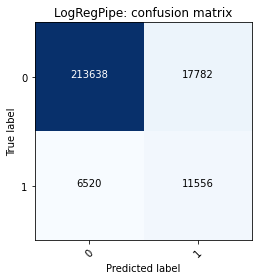

In [95]:
cm = confusion_matrix(y_valid, log_reg_pipeline_pred > pr_thresholds[ix])
plot_confusion_matrix(cm, classes=["0", "1"], model_name="LogRegPipe")

LogReg+Pipe: AUC_ROC = 0.872


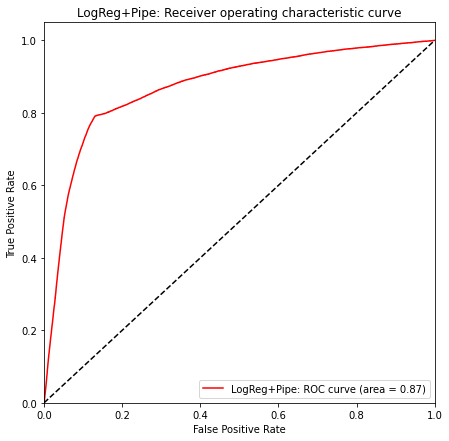

In [96]:
plt.figure(figsize=(7, 7))
plot_roc_curve(fpr, tpr, "LogReg+Pipe", color='r')
print("LogReg+Pipe: AUC_ROC = %.3f" % auc(fpr, tpr))

LogReg+Pipe: AUC_PR = 0.369


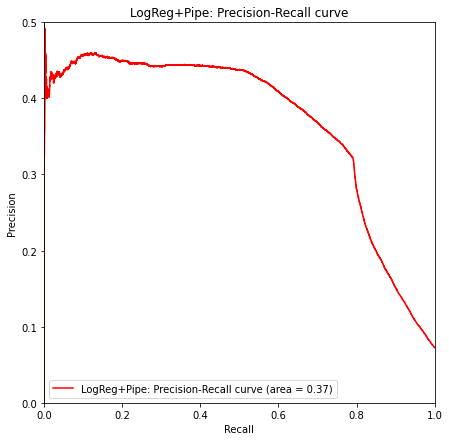

In [97]:
plt.figure(figsize=(7, 7))
    
plot_precision_recall_curve(recall, precision, "LogReg+Pipe", color='r', max_y=0.5)
print("LogReg+Pipe: AUC_PR = %.3f" % auc(recall, precision))

In [98]:
from sklearn.metrics import classification_report

print(classification_report(y_valid, log_reg_pipeline_pred > pr_thresholds[ix]))

              precision    recall  f1-score   support

         0.0       0.97      0.92      0.95    231420
         1.0       0.39      0.64      0.49     18076

    accuracy                           0.90    249496
   macro avg       0.68      0.78      0.72    249496
weighted avg       0.93      0.90      0.91    249496



In [99]:
import catboost

In [100]:
kfold_cv = KFold(n_splits=3, shuffle=True, random_state=13)

In [101]:
model_catb = catboost.CatBoostClassifier(cat_features=['id', 'vas_id'],
                                      silent=True, random_state=13)

In [102]:
param_grid = {
    "depth": [3],
    "iterations": [300],
    'l2_leaf_reg': [5, 15, 25]
}

In [103]:
catb_gsc = run_grid_search(model_catb, X_train, y_train, param_grid, kfold_cv)

Best roc_auc score: 0.94

Best parameters set found on development set:

{'depth': 3, 'iterations': 300, 'l2_leaf_reg': 25}

Grid scores on development set:

0.940 (+/-0.003) for {'depth': 3, 'iterations': 300, 'l2_leaf_reg': 5}
0.940 (+/-0.003) for {'depth': 3, 'iterations': 300, 'l2_leaf_reg': 15}
0.940 (+/-0.002) for {'depth': 3, 'iterations': 300, 'l2_leaf_reg': 25}



In [104]:
model_catb = catboost.CatBoostClassifier(n_estimators=200, 
                                         max_depth=3, 
                                         l2_leaf_reg=5, 
                                         cat_features=['id', 'vas_id'], 
                                         silent=True, 
                                         random_state=13)

In [105]:
%%time
model_catb.fit(X_train, y_train)

CPU times: total: 3min 43s
Wall time: 17.2 s


In [106]:
%%time
catb_pred = model_catb.predict_proba(X_valid)[:,1]

CPU times: total: 109 ms
Wall time: 115 ms


In [107]:
fpr, tpr, roc_thresholds = roc_curve(y_valid, catb_pred)
precision, recall, pr_thresholds = precision_recall_curve(y_valid, catb_pred)

In [108]:
beta = 1 
fscore = (1+beta**2)*(precision * recall) / (beta**2*precision + recall)
ix = np.nanargmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (pr_thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))

Best Threshold=0.266336, F-Score=0.598, Precision=0.533, Recall=0.682


CatBoost: AUC_ROC = 0.947


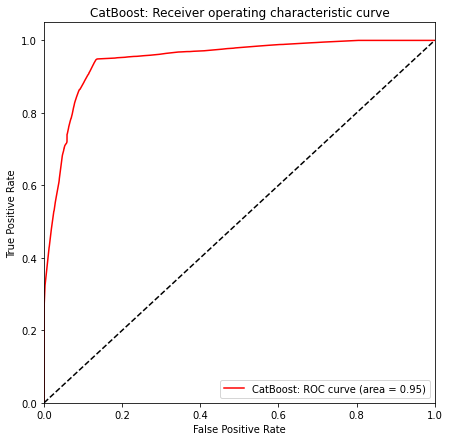

In [109]:
plt.figure(figsize=(7, 7))
plot_roc_curve(fpr, tpr, "CatBoost", color='r')
print("CatBoost: AUC_ROC = %.3f" % auc(fpr, tpr))

CatBoost: AUC_PR = 0.687


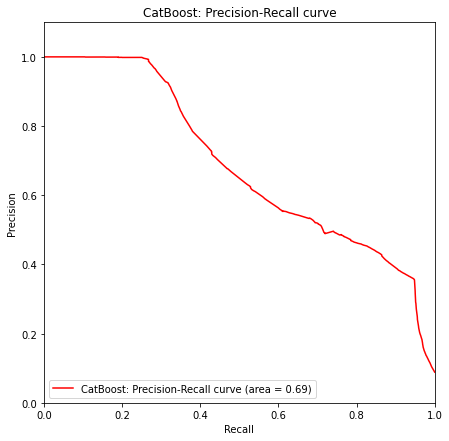

In [110]:
plt.figure(figsize=(7, 7))
    
plot_precision_recall_curve(recall, precision, "CatBoost", color='r', max_y=1.1)
print("CatBoost: AUC_PR = %.3f" % auc(recall, precision))

Confusion matrix, without normalization
[[220641  10779]
 [  5758  12318]]


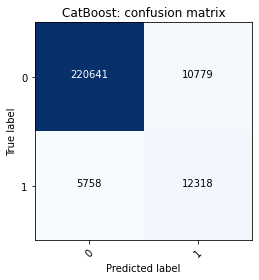

In [111]:
cm = confusion_matrix(y_valid, catb_pred > pr_thresholds[ix])
plot_confusion_matrix(cm, classes=["0", "1"], model_name="CatBoost");

In [112]:
print(classification_report(y_valid, catb_pred > pr_thresholds[ix]))

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96    231420
         1.0       0.53      0.68      0.60     18076

    accuracy                           0.93    249496
   macro avg       0.75      0.82      0.78    249496
weighted avg       0.94      0.93      0.94    249496



LogReg: AUC_PR = 0.085
LogReg: AUC_ROC = 0.565
LogReg+Pipe: AUC_PR = 0.369
LogReg+Pipe: AUC_ROC = 0.872
CatBoost: AUC_PR = 0.687
CatBoost: AUC_ROC = 0.947


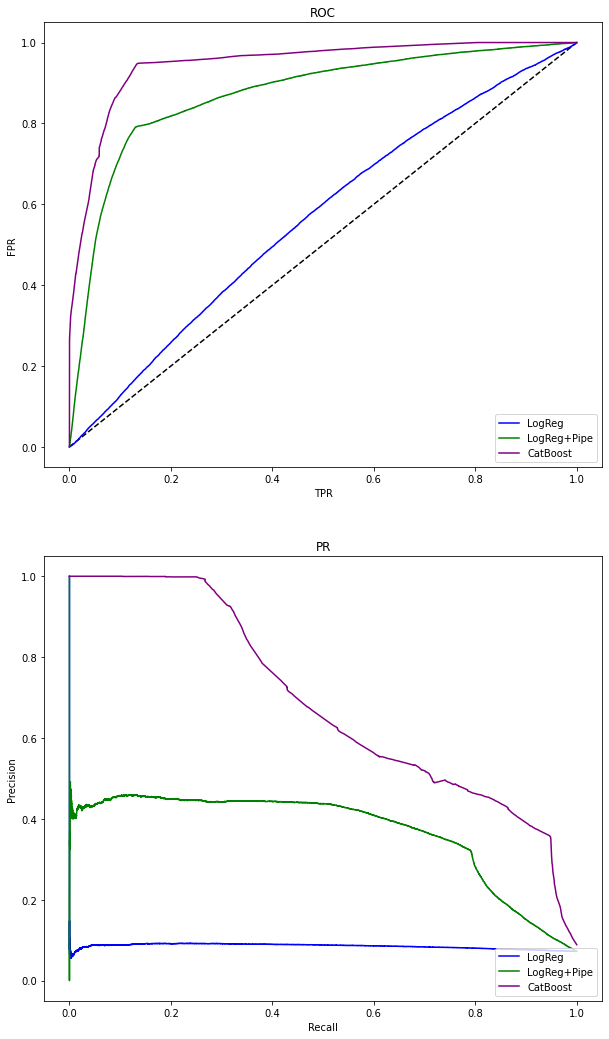

In [113]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

f.set_figheight(18)
f.set_figwidth(10)

ax1 = plt.subplot(211)
ax1.set_title('ROC')
ax1.set_xlabel('TPR')
ax1.set_ylabel('FPR')


ax2 = plt.subplot(212)
ax2.set_title('PR')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')

ax1.plot([0, 1], [0, 1], 'k--')

fpr, tpr, roc_thresholds = roc_curve(y_valid, log_reg_pred)
precision, recall, pr_thresholds = precision_recall_curve(y_valid, log_reg_pred)
ax1.plot(fpr, tpr, label='LogReg', color='b')
ax2.plot(recall, precision, label='LogReg', color='b')
print("LogReg: AUC_PR = %.3f" % auc(recall, precision))
print("LogReg: AUC_ROC = %.3f" % auc(fpr, tpr))


fpr, tpr, roc_thresholds = roc_curve(y_valid, log_reg_pipeline_pred)
precision, recall, pr_thresholds = precision_recall_curve(y_valid, log_reg_pipeline_pred)
ax1.plot(fpr, tpr, label="LogReg+Pipe", color='g')
ax2.plot(recall, precision, label="LogReg+Pipe", color='g')
print("LogReg+Pipe: AUC_PR = %.3f" % auc(recall, precision))
print("LogReg+Pipe: AUC_ROC = %.3f" % auc(fpr, tpr))


fpr, tpr, roc_thresholds = roc_curve(y_valid, catb_pred)
precision, recall, pr_thresholds = precision_recall_curve(y_valid, catb_pred)
ax1.plot(fpr, tpr, label="CatBoost", color='purple')
ax2.plot(recall, precision, label="CatBoost", color='purple')
print("CatBoost: AUC_PR = %.3f" % auc(recall, precision))
print("CatBoost: AUC_ROC = %.3f" % auc(fpr, tpr))
ax1.legend(loc="lower right")
ax2.legend(loc="lower right");


In [114]:
model_catb = catboost.CatBoostClassifier(n_estimators=200, 
                                         max_depth=3, 
                                         l2_leaf_reg=5, 
                                         cat_features=['id', 'vas_id'], 
                                         silent=True, 
                                         random_state=13)

In [115]:
%time
model_catb.fit(train, train_target)

CPU times: total: 0 ns
Wall time: 0 ns


In [116]:
result_proba = model_catb.predict_proba(test)

In [117]:
result = result_proba > pr_thresholds[ix]

In [118]:
answers_test = test[['id', 'vas_id', 'buy_time_x']]

In [119]:
target = pd.DataFrame(result[:, 1], columns = ['target'])

In [120]:
answers_test = pd.concat([answers_test, target], axis=1)

In [121]:
answers_test.rename(columns={'buy_time_x': 'buy_time'}, inplace=True)

In [122]:
answers_test['vas_id'] = answers_test['vas_id'].astype('float')

In [123]:
answers_test.head()

,id,vas_id,buy_time,target
0,3130519,2.0,1548018000,False
1,2000860,4.0,1548018000,False
2,1099444,2.0,1546808400,False
3,1343255,5.0,1547413200,False
4,1277040,2.0,1546808400,False


In [124]:
answers_test.to_csv('answers_test.csv')

In [125]:
model_catb.save_model('model.pcl')